In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Define the function
def custom_function(x):
    return (np.sin(np.tan(np.log2(x) * x)) +
            np.arctan(np.log2(x * (1 / np.cos(np.radians(30))))) +
            (x * np.exp(np.tan(np.cos(x) * np.sin(x * 1.43)))))

In [18]:
# Generate dataset
X = np.linspace(0.1, 10, 2000)
y = custom_function(X)

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Reshape for the neural network
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [46]:
# making neural network
inputs = keras.Input(shape=(1,))
x = layers.BatchNormalization()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [47]:
# lets compile the model guys
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [48]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_split=0.2)

# Evaluate the model
results = model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# predict the outcome
y_pred = model.predict(X_test)

Epoch 1/300
40/40 [==============================] - 3s 10ms/step - loss: 19.3878 - mean_squared_error: 19.3878 - mean_absolute_error: 3.3824 - val_loss: 65.6592 - val_mean_squared_error: 65.6592 - val_mean_absolute_error: 6.8967
Epoch 2/300
40/40 [==============================] - 0s 5ms/step - loss: 11.2327 - mean_squared_error: 11.2327 - mean_absolute_error: 2.8018 - val_loss: 63.5268 - val_mean_squared_error: 63.5268 - val_mean_absolute_error: 6.7991
Epoch 3/300
40/40 [==============================] - 0s 5ms/step - loss: 10.0228 - mean_squared_error: 10.0228 - mean_absolute_error: 2.5633 - val_loss: 60.5615 - val_mean_squared_error: 60.5615 - val_mean_absolute_error: 6.5854
Epoch 4/300
40/40 [==============================] - 0s 5ms/step - loss: 10.0488 - mean_squared_error: 10.0488 - mean_absolute_error: 2.5497 - val_loss: 57.6440 - val_mean_squared_error: 57.6440 - val_mean_absolute_error: 6.4161
Epoch 5/300
40/40 [==============================] - 0s 6ms/step - loss: 10.1544 - 

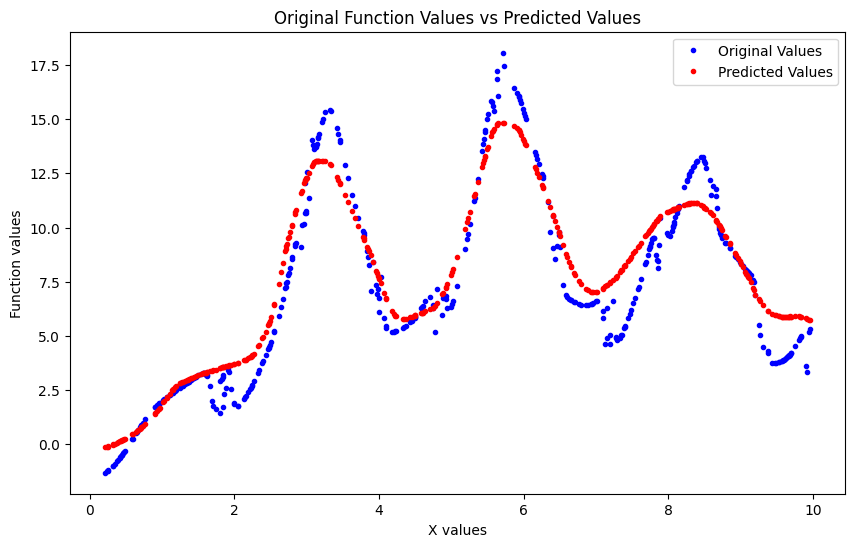

In [49]:
# Plot the original function values vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'b.', label='Original Values')
plt.plot(X_test, y_pred, 'r.', label='Predicted Values')
plt.title('Original Function Values vs Predicted Values')
plt.xlabel('X values')
plt.ylabel('Function values')
plt.legend()
plt.show()

In [50]:
# 7/7 - 0s - loss: 4.4825 - mean_squared_error: 4.4825 - mean_absolute_error: 1.7492 - 33ms/epoch - 5ms/step using relu
# 13/13 - 0s - loss: 83.4082 - mean_squared_error: 83.4082 - mean_absolute_error: 5.9213 - 256ms/epoch - 20ms/step using sigmoid but 2000 data set
# 13/13 - 0s - loss: 77.1459 - mean_squared_error: 77.1459 - mean_absolute_error: 5.6955 - 180ms/epoch - 14ms/step using leaky_relu
# 13/13 - 0s - loss: 2.3247 - mean_squared_error: 2.3247 - mean_absolute_error: 1.2216 - 200ms/epoch - 15ms/step more layers and relu
# 13/13 - 1s - loss: 1.5414 - mean_squared_error: 1.5414 - mean_absolute_error: 0.9984 - 954ms/epoch - 73ms/step using batch_nor and relu